# Grid Maker

The following functions are designed to take in a single set of coordinates and create a grid of equidistant points with dimensions of your choosing. From this we can use twitterscraper to pull tweets from a limited area around each of these points, and then be able to determine the level of danger at each of these areas specifically.

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
# this code has been adapted from stackoverflow.com
# takes in a set of coordinates, a bering, and a distance
# returns a new set of coordinates that is the specified distance away in the direction of the bering
def adj_grid_point(lat, lon, brng, d):
    
    R = 6378.1 #Radius of the Earth

    lat1 = math.radians(lat) #Current lat point converted to radians
    lon1 = math.radians(lon) #Current long point converted to radians

    # calculating the new latitude based on the distance and bering provided
    lat2 = math.asin( math.sin(lat1)*math.cos(d/R) +
         math.cos(lat1)*math.sin(d/R)*math.cos(brng))
    
    # calculating the new longitude based on the distance and bering provided
    lon2 = lon1 + math.atan2(math.sin(brng)*math.sin(d/R)*math.cos(lat1),
                 math.cos(d/R)-math.sin(lat1)*math.sin(lat2))

    # converting the latitude and longitude back from radians to degrees
    lat2 = math.degrees(lat2)
    lon2 = math.degrees(lon2)
    
    # returning the new set of coordinates
    return lat2, lon2

In [3]:
# testing the function above
adj_grid_point(40.744983, -73.982290, 1.57, 15)

(40.744953798297296, -73.80443344376857)

In [4]:
# this function returns a line of equidistant coordinate points in the form of a list
# takes in a starting latitude and longitude
# creates a line with a set number of points (length) at a set distance apart
# the line will be created from South to North
def grid_centers_line(lat, lon, length, distance):
    
    # setting the starting point for the line
    start = (lat, lon)
    
    # creating a list to store the coordinate points in the line
    # the first item in the list will be the starting point
    coordinates = [start]
    
    # repeat this process for the length of the line, excluding the starting point
    for i in range(1, length):
        
        # create a new point at the given distance Northbound from the previous point
        new_coordinates = adj_grid_point(lat, lon, 0, distance)
        # add this new point to the coordinate list
        coordinates.append(new_coordinates)
        # reset the point to be the new coordinates so that the line keeps moving up
        lat, lon = new_coordinates
    
    # return the final list of coordinates
    return coordinates

In [5]:
# testing the function above (5 points in a line going North, each 15km apart)
grid_centers_line(40.744983, -73.982290, 5, 15)

[(40.744983, -73.98229),
 (40.87973107430053, -73.98229),
 (41.01447914860106, -73.98229),
 (41.1492272229016, -73.98229),
 (41.28397529720214, -73.98229)]

In [6]:
# this function returns a grid of equidistant coordinate points in the form of a list
# takes in a starting latitude and longitude
# creates a grid of points of any dimension (length, width)
# the points can be any distance apart from each other
def make_grid(lat, lon, length, width, distance):
    
    # creating a list to store the grid of coordinates
    # the first items in the list will be generating using the line generating function
    # the line will start from the given latitude and longitude and continue North
    # the number of points will be the length given and they will be separated by the distance given
    grid = grid_centers_line(lat, lon, length, distance)
    
    # repeat this process for the width of the grid, excluding the first line
    for i in range(1, width):
        
        # find the point at the given distance East from the starting point of the previous line
        start = adj_grid_point(lat, lon, 1.5708, distance)
        # create a new line of points going North from the new starting point
        # add the points to the grid of coordinates list
        grid.extend(grid_centers_line(start[0], start[1], length, distance))
        # reset the latitude and longitude of the starting point so the grid keeps building to the East
        lat, lon = start
    
    # return the final grid of coordinates list
    return grid

In [7]:
# testing the function above (a 5 by 5 gird of coordinate points, each 15 km apart)
grid = make_grid(39.277811, -75.041283, 5, 5, 15)
grid

[(39.277811, -75.041283),
 (39.41255907430054, -75.041283),
 (39.54730714860107, -75.041283),
 (39.6820552229016, -75.041283),
 (39.816803297202135, -75.041283),
 (39.27768091776229, -74.8672093126453),
 (39.41242899206283, -74.8672093126453),
 (39.54717706636336, -74.8672093126453),
 (39.68192514066391, -74.8672093126453),
 (39.816673214964446, -74.8672093126453),
 (39.27755083612493, -74.6931359485081),
 (39.412298910425456, -74.6931359485081),
 (39.547046984725995, -74.6931359485081),
 (39.68179505902652, -74.6931359485081),
 (39.81654313332706, -74.6931359485081),
 (39.27742075508791, -74.51906290758481),
 (39.41216882938845, -74.51906290758481),
 (39.54691690368898, -74.51906290758481),
 (39.68166497798951, -74.51906290758481),
 (39.816413052290045, -74.51906290758481),
 (39.27729067465125, -74.34499018987187),
 (39.41203874895178, -74.34499018987187),
 (39.54678682325231, -74.34499018987187),
 (39.68153489755285, -74.34499018987187),
 (39.81628297185338, -74.34499018987187)]

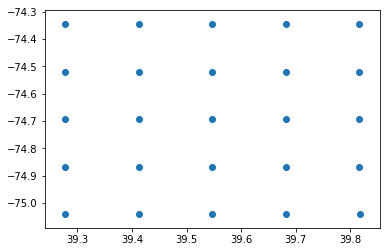

In [8]:
# visualizing the grid as a final test

# setting lists for plotting x and y
x = []
y = []

# populating the lists from the test grid created above
for coordinate in grid:
    x.append(coordinate[0])
    y.append(coordinate[1])

# using a scatterplot to visualize the results
plt.scatter(x, y);